In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/cancer.csv')

NameError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  228 non-null    int64  
 1   inst        228 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     228 non-null    float64
 7   ph.karno    228 non-null    float64
 8   pat.karno   228 non-null    float64
 9   meal.cal    228 non-null    float64
 10  wt.loss     228 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [1]:
cancer_patients = pd.DataFrame(df)
cancer_patients.to_csv("Cleaned cancer.csv", index= False)

NameError: ignored

In [ ]:
df

,Patient_ID,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.000000,10.11215
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.000000,15.00000
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,928.779006,15.00000
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.000000,11.00000
4,5,1.0,883,2,60,1,0.0,100.0,90.0,928.779006,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,928.779006,3.00000
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.000000,5.00000
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.000000,5.00000
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.000000,1.00000


In [ ]:
#K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:


X = df[['age','ph.ecog', 'ph.karno', 'pat.karno','meal.cal','wt.loss']]
X



,age,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,74,1.0,90.0,100.0,1175.000000,10.11215
1,68,0.0,90.0,90.0,1225.000000,15.00000
2,56,0.0,90.0,90.0,928.779006,15.00000
3,57,1.0,90.0,60.0,1150.000000,11.00000
4,60,0.0,100.0,90.0,928.779006,0.00000
...,...,...,...,...,...,...
223,77,1.0,80.0,60.0,928.779006,3.00000
224,39,0.0,90.0,90.0,2350.000000,5.00000
225,75,2.0,60.0,70.0,1025.000000,5.00000
226,66,1.0,90.0,100.0,1075.000000,1.00000


In [ ]:
X

,age,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,74,1.0,90.0,100.0,1175.000000,10.11215
1,68,0.0,90.0,90.0,1225.000000,15.00000
2,56,0.0,90.0,90.0,928.779006,15.00000
3,57,1.0,90.0,60.0,1150.000000,11.00000
4,60,0.0,100.0,90.0,928.779006,0.00000
...,...,...,...,...,...,...
223,77,1.0,80.0,60.0,928.779006,3.00000
224,39,0.0,90.0,90.0,2350.000000,5.00000
225,75,2.0,60.0,70.0,1025.000000,5.00000
226,66,1.0,90.0,100.0,1075.000000,1.00000


In [ ]:
names = X.columns
names


Index(['age', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'], dtype='object')

In [ ]:
#scaling the data
from sklearn import preprocessing

d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=names)

scaled_df

,age,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,0.062445,0.000844,0.075947,0.084386,0.991533,0.008533
1,0.055125,0.000000,0.072959,0.072959,0.993060,0.012160
2,0.059622,0.000000,0.095821,0.095821,0.988851,0.015970
3,0.049285,0.000865,0.077819,0.051879,0.994350,0.009511
4,0.063803,0.000000,0.106339,0.095705,0.987655,0.000000
...,...,...,...,...,...,...
223,0.082149,0.001067,0.085350,0.064012,0.990887,0.003201
224,0.016569,0.000000,0.038236,0.038236,0.998397,0.002124
225,0.072683,0.001938,0.058146,0.067837,0.993331,0.004846
226,0.060807,0.000921,0.082919,0.092132,0.990423,0.000921


In [ ]:
#performing pca for better visualisation of the data
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [ ]:
X_pca = pca.fit_transform(scaled_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_


X_pca

array([[-3.78846823e-02,  1.76466147e-03],
       [-4.86160438e-02,  7.66916079e-03],
       [-2.03969830e-02, -8.41217759e-03],
       [-5.92211109e-02,  1.64422663e-02],
       [-1.44996699e-02, -1.49162177e-02],
       [ 5.09820237e-02, -9.32824250e-03],
       [ 1.23403753e-01,  9.68091234e-04],
       [ 4.94849580e-02, -1.33132349e-02],
       [-2.47634480e-02, -2.63914049e-03],
       [ 2.49235583e-01, -5.05500664e-03],
       [-4.10199709e-02,  9.42138906e-03],
       [-3.41350221e-02,  1.96747725e-02],
       [-1.51034683e-02, -6.34090953e-03],
       [-7.18086552e-02,  2.61769100e-02],
       [-1.12307910e-01,  3.61482143e-02],
       [-2.01642481e-02, -3.25784546e-04],
       [-3.96604677e-02, -5.86900142e-03],
       [-6.06438256e-02,  2.32154363e-02],
       [ 2.34718746e-01, -2.81308759e-02],
       [-5.38205181e-02,  5.64584966e-03],
       [-3.73458250e-02,  1.02540065e-02],
       [-5.92667060e-02, -7.53217897e-05],
       [-4.17086149e-02,  3.77827284e-04],
       [-2.

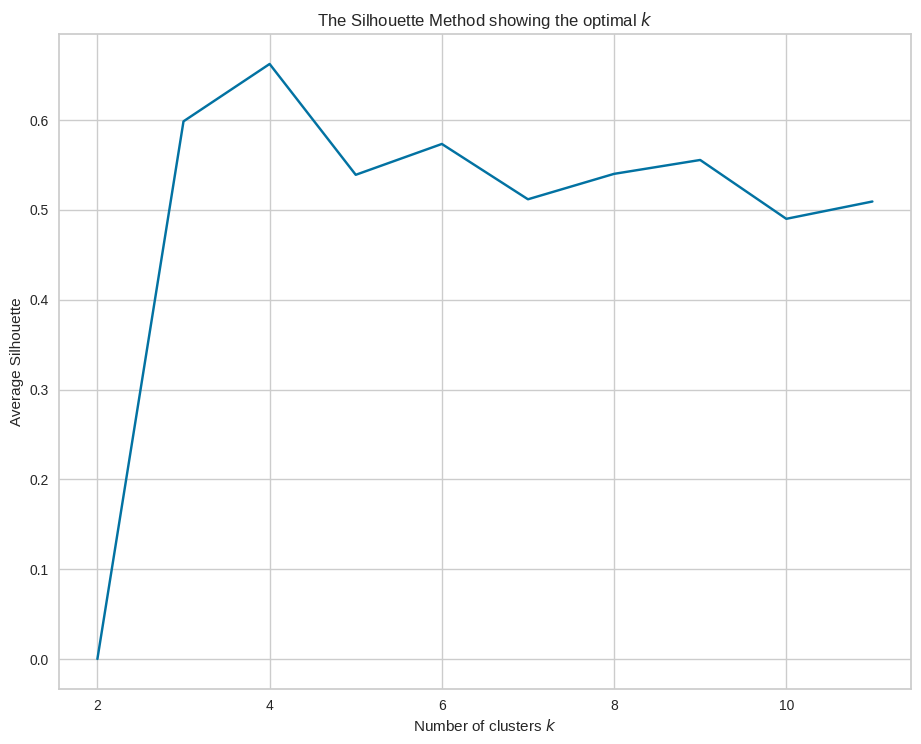

In [ ]:
scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(X)
    score = silhouette_score(X, fitx.labels_)
    scores.append(score)

plt.figure(figsize=(11,8.5))
plt.plot(range(2,12), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Silhouette Method showing the optimal $k$')
plt.show()

In [ ]:
#performing kmeans with k values 2, 3, 4, 5
# k = 2 clusters

model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
label

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:


model.cluster_centers_



array([[0.06465294, 0.00100811, 0.08555108, 0.08412812, 0.98972302,
        0.00946565],
       [0.19076117, 0.00321405, 0.2225691 , 0.19552299, 0.92299274,
        0.05079848]])

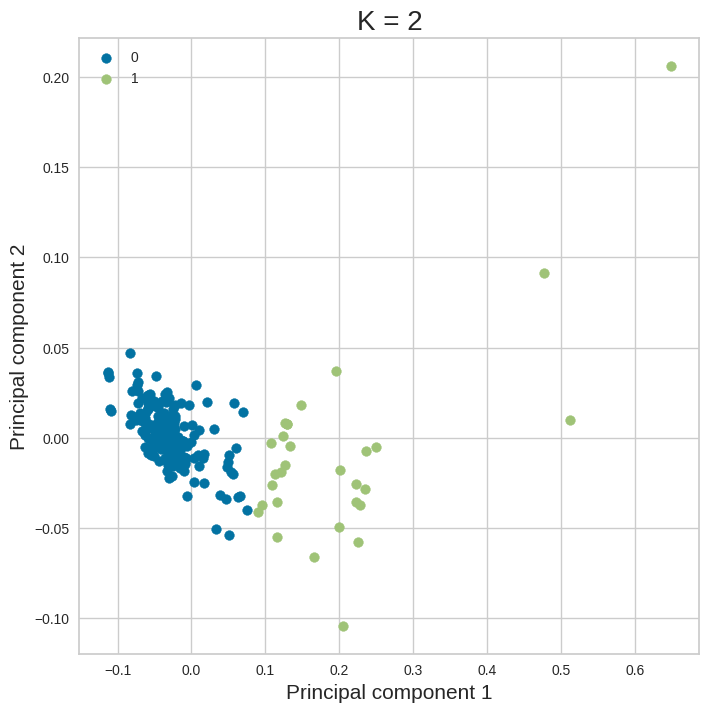

In [ ]:


plt.figure(figsize=(8,8))
uniq = np.unique(label)
centers = np.array(model.cluster_centers_)
for i in uniq:
   plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)


#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 2', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()



In [ ]:
model3 = KMeans(n_clusters = 3, init = "k-means++")
label3 = model3.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:


label3



array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

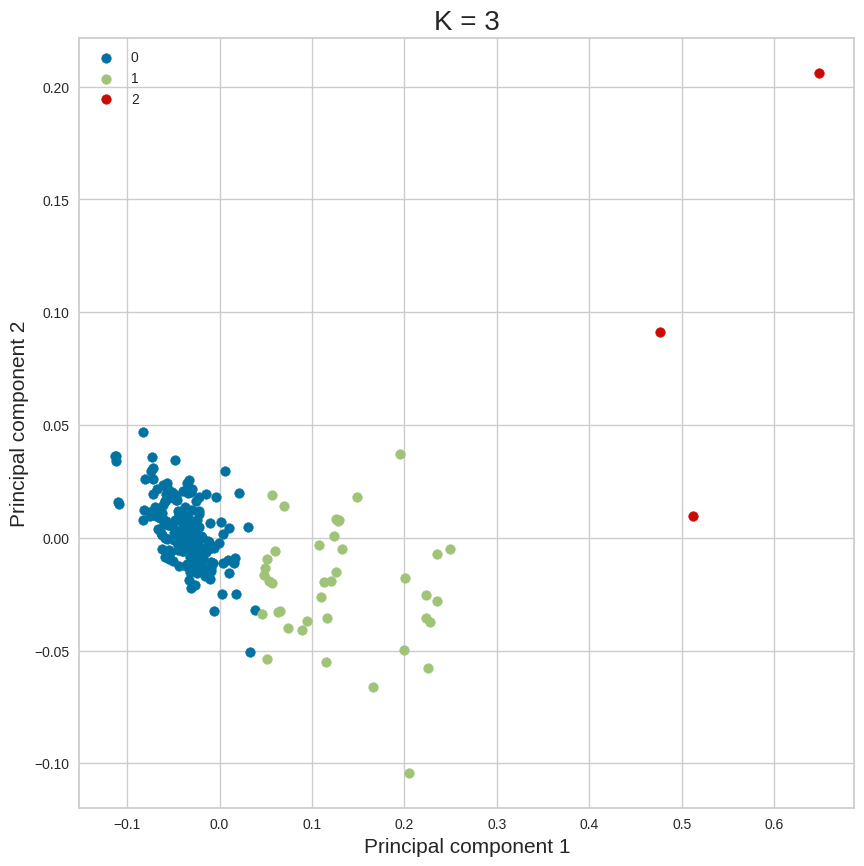

In [ ]:


plt.figure(figsize=(10,10))
uniq3 = np.unique(label3)
centers3 = np.array(model3.cluster_centers_)
for i in uniq3:
   plt.scatter(X_pca[label3 == i , 0] , X_pca[label3 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 3', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()



In [ ]:
model4 = KMeans(n_clusters = 4, init = "k-means++")
label4 = model4.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centers4 = np.array(model4.cluster_centers_)
centers4

array([[6.12454732e-02, 9.45507036e-04, 8.10181744e-02, 7.93489964e-02,
        9.91074404e-01, 8.43634533e-03],
       [1.87600933e-01, 2.74511939e-03, 2.42424454e-01, 2.13218484e-01,
        9.25044471e-01, 4.08473489e-02],
       [4.20220115e-01, 8.56477230e-03, 4.14139780e-01, 2.58065344e-01,
        7.38677770e-01, 1.36309479e-01],
       [1.24695822e-01, 2.10671557e-03, 1.52237643e-01, 1.53184588e-01,
        9.66542948e-01, 3.10852214e-02]])

In [ ]:


centers4[1]



array([0.18760093, 0.00274512, 0.24242445, 0.21321848, 0.92504447,
       0.04084735])

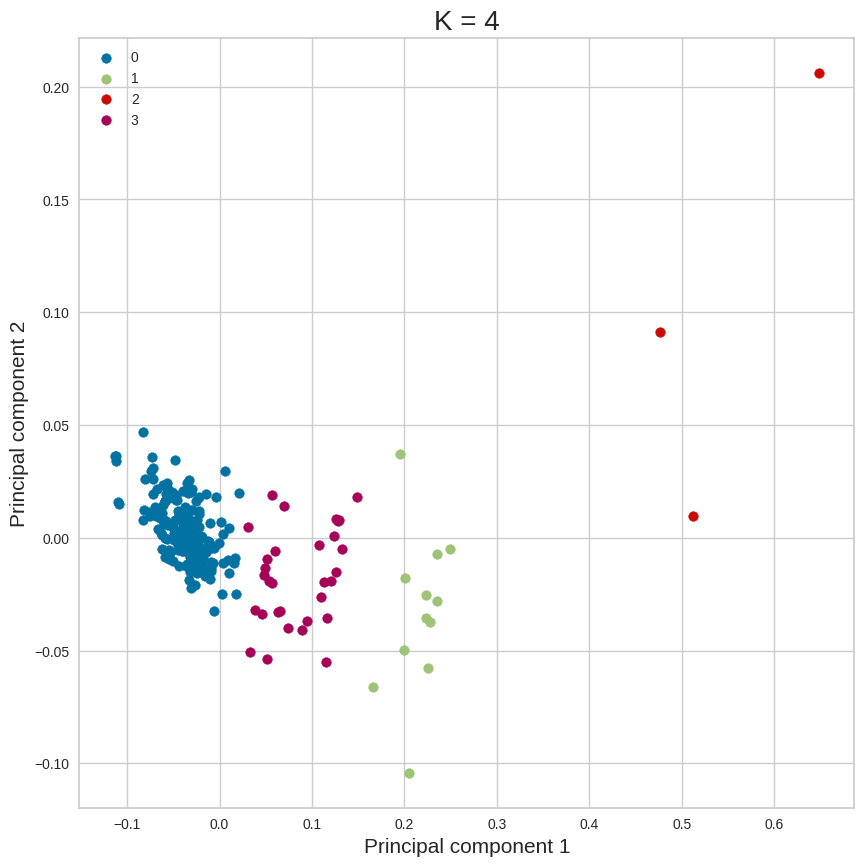

In [ ]:


plt.figure(figsize=(10,10))
uniq4 = np.unique(label4)
centers4 = np.array(model4.cluster_centers_)
for i in uniq4:
   plt.scatter(X_pca[label4 == i , 0] , X_pca[label4 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 4', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()



In [ ]:
model5 = KMeans(n_clusters = 5, init = "k-means++")
label5 = model5.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


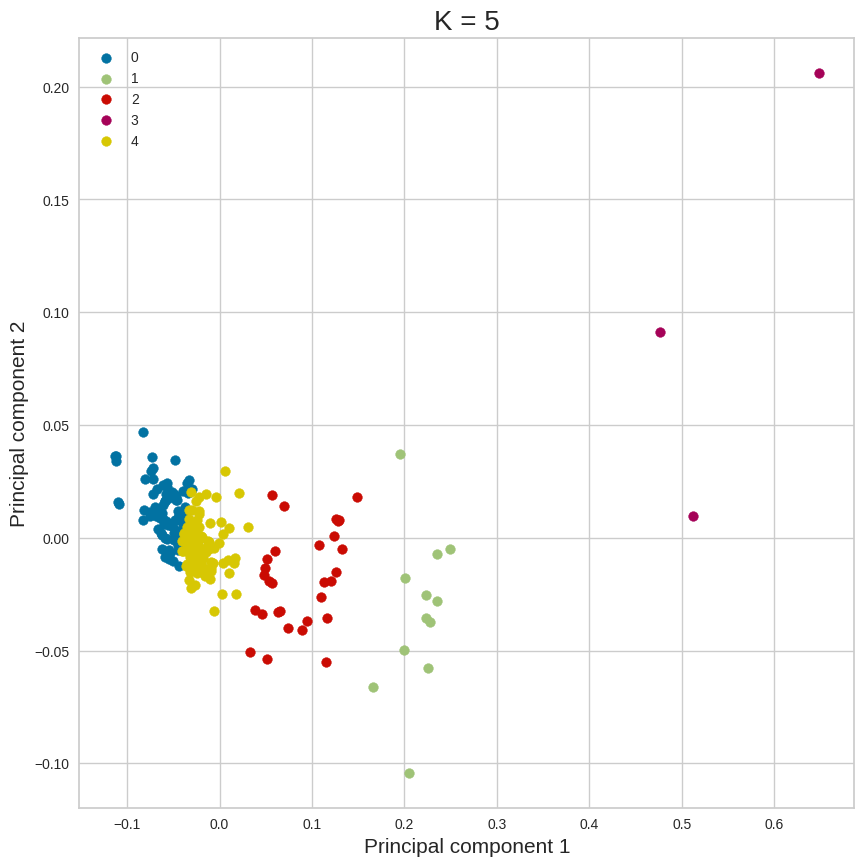

In [ ]:


plt.figure(figsize=(10,10))
uniq5 = np.unique(label5)
centers5 = np.array(model5.cluster_centers_)
for i in uniq5:
   plt.scatter(X_pca[label5 == i , 0] , X_pca[label5 == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.title('K = 5', fontsize = 20)
plt.xlabel('Principal component 1',fontsize = 15)
plt.ylabel('Principal component 2',fontsize = 15)
plt.show()



In [ ]:

B1  = X[['age','ph.ecog']]


In [ ]:

#labels added to dataset
B1['cluster'] = label
B1.head(5)

<ipython-input-172-9d1645e8696f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B1['cluster'] = label


,age,ph.ecog,cluster
0,74,1.0,0
1,68,0.0,0
2,56,0.0,0
3,57,1.0,0
4,60,0.0,0
